In [7]:
import numpy as np
class lg:
    def __init__(self,lr  = 0.01,epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        self.losses = []


    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def compute_loss(self,y,y_pred):
        return -np.mean(y*np.log(y_pred+1e-9)  + (1-y)*np.log(1-y_pred+1e-9))
    

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X,self.w) + self.b
            y_pred = self.sigmoid(linear_model)

            loss = self.compute_loss(y,y_pred)
            self.losses.append(loss)
            error = y-y_pred
            dw = (1/n_samples) * np.dot(X.T,error)
            db = (1/n_samples) * np.sum(error)

            self.w -= self.lr*dw
            self.b -= self.lr*db
    def predict(self,X):
        linear_model = np.dot(X,self.w) + self.b
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >=0.5,1,0)
    

        
        

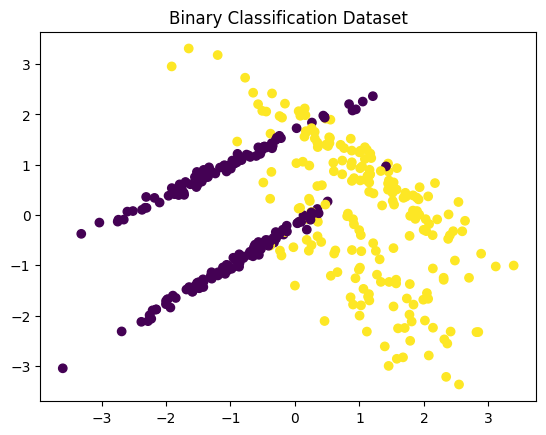

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a binary classification dataset
X_bin, y_bin = make_classification(n_samples=500,
                                   n_features=2,
                                   n_classes=2,
                                   n_informative=2,
                                   n_redundant=0,
                                   random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X_bin,y_bin,test_size=0.2,random_state=42)
model_bin = lg(lr=0.1, epochs=1000)
model_bin.fit(X_train, y_train)
y_pred = model_bin.predict(X_test)
plt.scatter(X_train[:, 0], X_train[:, 1],c = y_train)
plt.title("Binary Classification Dataset")
plt.show()
# Train custom logistic regression


